### Importing neccessary libraries and reading in the data

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
training_df = pd.read_csv('pisa2009train.csv')
target_train = training_df['readingScore']
testing_df = pd.read_csv('pisa2009test.csv')
target_test = testing_df['readingScore']
full_df = pd.concat([training_df,testing_df])

In [2]:
# looking at first few rows
full_df.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [3]:
# looking at basic statistics high level
full_df.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,5233.000000,5233.000000,5156.000000,5148.000000,5091.000000,4648.000000,5104.000000,4863.000000,4376.000000,4887.000000,...,5135.000000,5138.000000,5178.000000,4944.000000,4870.000000,5032.000000,5233.000000,5233.000000,5002.000000,5233.000000
mean,10.091152,0.513472,0.719162,0.780303,0.876449,0.342943,0.729820,0.856056,0.329982,0.850215,...,0.869718,0.898988,0.287756,265.717840,24.559754,0.966017,0.934072,0.383145,1374.367653,497.591875
std,0.552573,0.499866,0.449452,0.414082,0.329101,0.474744,0.444096,0.351069,0.470260,0.356897,...,0.336647,0.301374,0.452760,149.591118,7.139661,0.181202,0.248180,0.486200,870.424790,95.598917
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,156.380000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.270000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1233.000000,499.580000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,565.510000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,90.000000,1.000000,1.000000,1.000000,6694.000000,772.460000


In [4]:
# exploring data types
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5233 entries, 0 to 1569
Data columns (total 24 columns):
grade                    5233 non-null int64
male                     5233 non-null int64
raceeth                  5185 non-null object
preschool                5156 non-null float64
expectBachelors          5148 non-null float64
motherHS                 5091 non-null float64
motherBachelors          4648 non-null float64
motherWork               5104 non-null float64
fatherHS                 4863 non-null float64
fatherBachelors          4376 non-null float64
fatherWork               4887 non-null float64
selfBornUS               5140 non-null float64
motherBornUS             5139 non-null float64
fatherBornUS             5062 non-null float64
englishAtHome            5135 non-null float64
computerForSchoolwork    5138 non-null float64
read30MinsADay           5178 non-null float64
minutesPerWeekEnglish    4944 non-null float64
studentsInEnglish        4870 non-null float64
schoo

In [5]:
# extracting dummy variables
full_df['raceeth'].value_counts()

White                                     2894
Hispanic                                  1184
Black                                      635
Asian                                      204
More than one race                         177
American Indian/Alaska Native               51
Native Hawaiian/Other Pacific Islander      40
Name: raceeth, dtype: int64

In [6]:
full_df = pd.concat([pd.get_dummies(full_df['raceeth']),full_df],axis=1).drop(columns='raceeth')

In [7]:
# splitting data into categorical and continuous
categorical = []
for var in full_df:
    if full_df[var].dtype == 'O':
        categorical.append(var)
    else: 
        if full_df[var].max() == 1:
            categorical.append(var)
categorical

['American Indian/Alaska Native',
 'Asian',
 'Black',
 'Hispanic',
 'More than one race',
 'Native Hawaiian/Other Pacific Islander',
 'White',
 'male',
 'preschool',
 'expectBachelors',
 'motherHS',
 'motherBachelors',
 'motherWork',
 'fatherHS',
 'fatherBachelors',
 'fatherWork',
 'selfBornUS',
 'motherBornUS',
 'fatherBornUS',
 'englishAtHome',
 'computerForSchoolwork',
 'read30MinsADay',
 'schoolHasLibrary',
 'publicSchool',
 'urban']

In [8]:
continuous = []
for var in full_df:
    if var not in categorical:
        continuous.append(var)
continuous

['grade',
 'minutesPerWeekEnglish',
 'studentsInEnglish',
 'schoolSize',
 'readingScore']

In [9]:
# grade is actually a categorical value so let me fix that
if 'grade' not in categorical:
    categorical.append('grade')
continuous.remove('grade')

Don't forget to drop one of the races later otherwise there will be an issue of multicolinearity

In [10]:
# looking for null values and deciding what to do with those
nulls = pd.DataFrame(full_df.isnull().sum().sort_values(ascending=False),columns=['null_count']).reset_index()
percent = pd.DataFrame((1-(round(full_df.count()/5233,2))),columns=['percent_of_total']).reset_index()
nulls.merge(percent,how='left',on='index')

,index,null_count,percent_of_total
0,fatherBachelors,857,0.16
1,motherBachelors,585,0.11
2,fatherHS,370,0.07
3,studentsInEnglish,363,0.07
4,fatherWork,346,0.07
5,minutesPerWeekEnglish,289,0.06
6,schoolSize,231,0.04
7,schoolHasLibrary,201,0.04
8,fatherBornUS,171,0.03
9,motherHS,142,0.03


In [11]:
# since we are missing more than 10% of the column we will just drop these two columns
# father bachelors, mother bachelors
full_df.drop(columns=['fatherBachelors','motherBachelors'],inplace=True)

## Removing outliers

In [12]:
# removing our target variable from our continuous list
continuous.remove('readingScore')

In [13]:

for column in continuous:
    Q1 = full_df[column].quantile(0.25)
    Q3 = full_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    full_df = full_df[full_df[column] > lower_fence]
    full_df = full_df[full_df[column] < upper_fence]

In [14]:
# looking for outliers in the continuous data
full_df[continuous].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,3568.000000,3568.000000,3568.000000
mean,255.995516,24.477859,1384.922926
std,47.766533,6.171692,843.660907
min,120.000000,6.000000,100.000000
25%,225.000000,20.000000,690.000000
50%,250.000000,25.000000,1273.000000
75%,275.000000,30.000000,1988.000000
max,410.000000,44.000000,3592.000000


In [15]:
print(full_df[continuous].shape)
full_df[continuous].info()

(3568, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 2 to 1565
Data columns (total 3 columns):
minutesPerWeekEnglish    3568 non-null float64
studentsInEnglish        3568 non-null float64
schoolSize               3568 non-null float64
dtypes: float64(3)
memory usage: 111.5 KB


### Now I will drop all the remaining nulls

In [16]:
full_df.dropna(inplace=True)

For our continuous variables we will make a scatter plot against our target variable

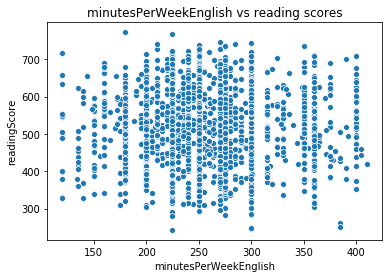

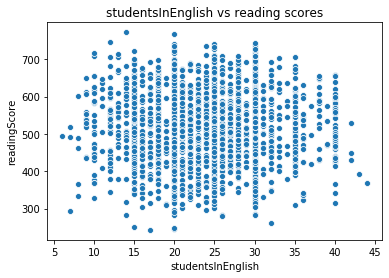

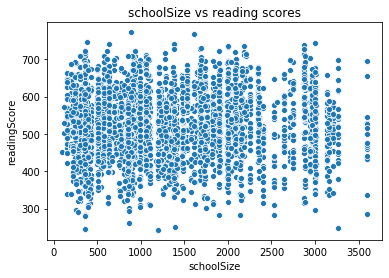

In [17]:
for var in continuous:
    plt.figure()
    plt.title(var+' vs reading scores')
    sns.scatterplot(x=var,y='readingScore',data=full_df)

In [18]:
full_df[continuous+['readingScore']].corr()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize,readingScore
minutesPerWeekEnglish,1.000000,0.189961,0.135780,0.001611
studentsInEnglish,0.189961,1.000000,0.368812,-0.005160
schoolSize,0.135780,0.368812,1.000000,0.030362
readingScore,0.001611,-0.005160,0.030362,1.000000


In [23]:
full_df.reset_index(drop=True).to_csv('clean_data_for_regression.csv')